# Chapter 1: Foundations of Electromagnetic Theory

**PyMetaLearn - Metamaterial Physics Workbook**

---

## Learning Objectives

By the end of this chapter, you will:
- Understand Maxwell's equations in matter
- Derive the wave equation from first principles
- Understand the role of permittivity (ε) and permeability (μ)
- Learn about the refractive index and its relation to material properties
- Master the **angular spectrum representation** of electromagnetic fields
- Understand **propagating vs evanescent waves** and the diffraction limit
- Set the foundation for understanding metamaterials

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from IPython.display import display, Markdown, Math

# Enable inline plotting
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

# Initialize SymPy printing
init_printing(use_latex=True)

print("Libraries loaded successfully!")

Libraries loaded successfully!


---

## 1.1 Maxwell's Equations in Matter

James Clerk Maxwell unified electricity and magnetism in 1865. In a material medium, Maxwell's equations take the form:

| Equation | Name | Physical Meaning |
|----------|------|------------------|
| $\nabla \cdot \mathbf{D} = \rho_f$ | Gauss's Law | Electric charges create diverging D-fields |
| $\nabla \cdot \mathbf{B} = 0$ | Gauss's Law for Magnetism | No magnetic monopoles |
| $\nabla \times \mathbf{E} = -\frac{\partial \mathbf{B}}{\partial t}$ | Faraday's Law | Changing B creates curling E |
| $\nabla \times \mathbf{H} = \mathbf{J}_f + \frac{\partial \mathbf{D}}{\partial t}$ | Ampère-Maxwell Law | Currents and changing D create curling H |

### Field Definitions

- **E**: Electric field (V/m)
- **H**: Magnetic field (A/m)
- **D**: Electric displacement field (C/m²)
- **B**: Magnetic flux density (T)

---

## 1.2 Constitutive Relations

The constitutive relations connect the field pairs (E, D) and (H, B) through material properties:

$$\mathbf{D} = \varepsilon_0 \varepsilon_r \mathbf{E} = \varepsilon \mathbf{E}$$

$$\mathbf{B} = \mu_0 \mu_r \mathbf{H} = \mu \mathbf{H}$$

Where:
- $\varepsilon_0 = 8.854 \times 10^{-12}$ F/m (permittivity of free space)
- $\mu_0 = 4\pi \times 10^{-7}$ H/m (permeability of free space)
- $\varepsilon_r$ = relative permittivity (dielectric constant)
- $\mu_r$ = relative permeability

### Key Insight for Metamaterials

> **In natural materials**, $\varepsilon_r > 0$ and $\mu_r \approx 1$ at optical frequencies.
> 
> **Metamaterials engineer artificial structures** where $\varepsilon_r < 0$ or $\mu_r < 0$ can be achieved!

In [2]:
# Physical Constants
epsilon_0 = 8.854e-12  # F/m - permittivity of free space
mu_0 = 4 * np.pi * 1e-7  # H/m - permeability of free space
c = 1 / np.sqrt(epsilon_0 * mu_0)  # Speed of light in vacuum

print(f"Speed of light in vacuum: c = {c:.4e} m/s")
print(f"\nThis is derived from: c = 1/√(ε₀μ₀)")

Speed of light in vacuum: c = 2.9980e+08 m/s

This is derived from: c = 1/√(ε₀μ₀)


---

## 1.3 Derivation: The Wave Equation

Let's derive the electromagnetic wave equation from Maxwell's equations step by step.

### Starting Point
In a source-free region ($\rho_f = 0$, $\mathbf{J}_f = 0$):

$$\nabla \times \mathbf{E} = -\frac{\partial \mathbf{B}}{\partial t}$$

$$\nabla \times \mathbf{H} = \frac{\partial \mathbf{D}}{\partial t}$$

In [3]:
# Symbolic derivation of the wave equation
from sympy.vector import CoordSys3D, curl, divergence

# Define symbols
x, y, z, t = symbols('x y z t', real=True)
omega, k, epsilon, mu = symbols('omega k varepsilon mu', positive=True)
E_0, H_0 = symbols('E_0 H_0')
c_sym = symbols('c', positive=True)

display(Markdown("### Step 1: Take the curl of Faraday's Law"))
display(Math(r"\nabla \times (\nabla \times \mathbf{E}) = -\frac{\partial}{\partial t}(\nabla \times \mathbf{B})"))

display(Markdown("### Step 2: Use the vector identity"))
display(Math(r"\nabla \times (\nabla \times \mathbf{E}) = \nabla(\nabla \cdot \mathbf{E}) - \nabla^2 \mathbf{E}"))

display(Markdown("### Step 3: In source-free region, ∇·E = 0"))
display(Math(r"-\nabla^2 \mathbf{E} = -\mu \frac{\partial}{\partial t}(\nabla \times \mathbf{H})"))

display(Markdown("### Step 4: Substitute Ampère-Maxwell Law"))
display(Math(r"-\nabla^2 \mathbf{E} = -\mu \frac{\partial}{\partial t}\left(\varepsilon \frac{\partial \mathbf{E}}{\partial t}\right)"))

display(Markdown("### Step 5: The Wave Equation"))
display(Math(r"\boxed{\nabla^2 \mathbf{E} = \mu \varepsilon \frac{\partial^2 \mathbf{E}}{\partial t^2}}"))

### Step 1: Take the curl of Faraday's Law

<IPython.core.display.Math object>

### Step 2: Use the vector identity

<IPython.core.display.Math object>

### Step 3: In source-free region, ∇·E = 0

<IPython.core.display.Math object>

### Step 4: Substitute Ampère-Maxwell Law

<IPython.core.display.Math object>

### Step 5: The Wave Equation

<IPython.core.display.Math object>

---

## 1.4 Phase Velocity and Refractive Index

The wave equation has plane wave solutions of the form:

$$\mathbf{E}(\mathbf{r}, t) = \mathbf{E}_0 e^{i(\mathbf{k} \cdot \mathbf{r} - \omega t)}$$

Substituting into the wave equation:

$$k^2 = \omega^2 \mu \varepsilon$$

The **phase velocity** is:

$$v_p = \frac{\omega}{k} = \frac{1}{\sqrt{\mu \varepsilon}} = \frac{c}{\sqrt{\mu_r \varepsilon_r}}$$

The **refractive index** is:

$$\boxed{n = \frac{c}{v_p} = \sqrt{\mu_r \varepsilon_r}}$$

In [4]:
# Explore the refractive index for different materials
materials = {
    'Vacuum': (1.0, 1.0),
    'Air': (1.00054, 1.0),
    'Glass (BK7)': (2.3, 1.0),
    'Water': (1.77, 1.0),
    'Silicon': (11.7, 1.0),
    'Diamond': (5.7, 1.0),
}

print("Material Properties at Optical Frequencies")
print("=" * 50)
print(f"{'Material':<20} {'εᵣ':<10} {'μᵣ':<10} {'n':<10}")
print("-" * 50)

for material, (eps_r, mu_r) in materials.items():
    n = np.sqrt(eps_r * mu_r)
    print(f"{material:<20} {eps_r:<10.3f} {mu_r:<10.3f} {n:<10.3f}")

Material Properties at Optical Frequencies
Material             εᵣ         μᵣ         n         
--------------------------------------------------
Vacuum               1.000      1.000      1.000     
Air                  1.001      1.000      1.000     
Glass (BK7)          2.300      1.000      1.517     
Water                1.770      1.000      1.330     
Silicon              11.700     1.000      3.421     
Diamond              5.700      1.000      2.387     


---

## 1.5 Angular Spectrum Representation

Any electromagnetic field can be decomposed into a **superposition of plane waves** with different transverse wavevector components $(k_x, k_y)$.

### The Angular Spectrum Integral

$$\boxed{\vec{E}(x,y,z,t) = \sum_{s=s,p} \iint_{-\infty}^{\infty} dk_x \, dk_y \, \hat{E}_s(k_x,k_y) \, e^{i(k_x x + k_y y)} e^{ik_z(z-z_0)} e^{-i\omega t}}$$

where the **z-component of the wavevector** comes from the dispersion relation:

$$k_z = \sqrt{\frac{\omega^2}{c^2} - k_x^2 - k_y^2} = \sqrt{k_0^2 - k_x^2 - k_y^2}$$

with $k_0 = \omega/c = 2\pi/\lambda$ being the free-space wavenumber.

### Physical Interpretation

- $\hat{E}(k_x, k_y)$ is the **spatial Fourier transform** of the field at $z = z_0$
- Each $(k_x, k_y)$ component propagates at angle $\theta = \arctan(\sqrt{k_x^2+k_y^2}/k_z)$
- The sum $s=s,p$ is over the two polarization states

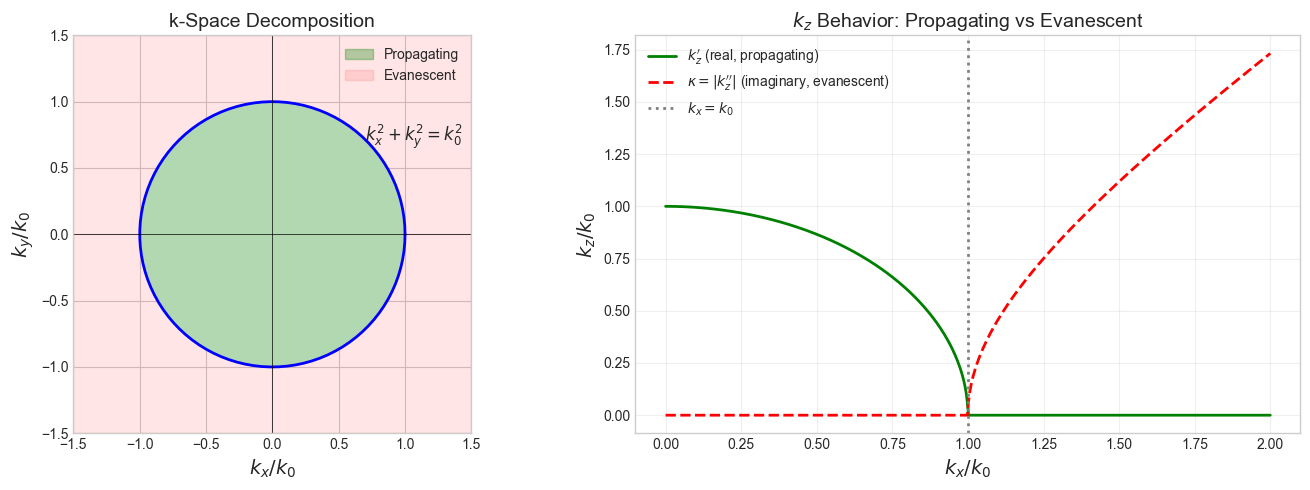

Propagating waves: kx² + ky² < k0²  →  kz is REAL
Evanescent waves:  kx² + ky² > k0²  →  kz is IMAGINARY


In [6]:
# Visualize the k-space decomposition
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: k-space circle
ax1 = axes[0]
theta = np.linspace(0, 2*np.pi, 100)
k0 = 1.0  # Normalized

# Propagating region (inside circle)
ax1.fill(k0 * np.cos(theta), k0 * np.sin(theta), alpha=0.3, color='green', label='Propagating')
ax1.plot(k0 * np.cos(theta), k0 * np.sin(theta), 'b-', linewidth=2)

# Evanescent region (outside circle)
ax1.fill_between(np.linspace(-1.5, 1.5, 100), -1.5, 1.5, alpha=0.1, color='red', label='Evanescent')
ax1.fill(k0 * np.cos(theta), k0 * np.sin(theta), alpha=1, color='white')
ax1.fill(k0 * np.cos(theta), k0 * np.sin(theta), alpha=0.3, color='green')

ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.set_xlabel(r'$k_x / k_0$', fontsize=14)
ax1.set_ylabel(r'$k_y / k_0$', fontsize=14)
ax1.set_title('k-Space Decomposition', fontsize=14)
ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-1.5, 1.5)
ax1.set_aspect('equal')
ax1.legend()
ax1.annotate(r'$k_x^2 + k_y^2 = k_0^2$', xy=(0.7, 0.7), fontsize=12)

# Right: kz behavior
ax2 = axes[1]
kx = np.linspace(0, 2, 500)
kz_real = np.sqrt(np.maximum(0, k0**2 - kx**2))
kz_imag = np.sqrt(np.maximum(0, kx**2 - k0**2))

ax2.plot(kx, kz_real, 'g-', linewidth=2, label=r"$k_z'$ (real, propagating)")
ax2.plot(kx, kz_imag, 'r--', linewidth=2, label=r"$\kappa = |k_z''|$ (imaginary, evanescent)")
ax2.axvline(x=k0, color='gray', linestyle=':', linewidth=2, label=r'$k_x = k_0$')

ax2.set_xlabel(r'$k_x / k_0$', fontsize=14)
ax2.set_ylabel(r'$k_z / k_0$', fontsize=14)
ax2.set_title(r'$k_z$ Behavior: Propagating vs Evanescent', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('Propagating waves: kx² + ky² < k0²  →  kz is REAL')
print('Evanescent waves:  kx² + ky² > k0²  →  kz is IMAGINARY')

---

## 1.6 Propagating vs Evanescent Waves

The character of $k_z$ depends on the transverse wavevector magnitude:

| Condition | $k_z$ Type | Wave Behavior |
|-----------|-----------|---------------|
| $k_x^2 + k_y^2 < k_0^2$ | Real: $k_z = k_z'$ | **Propagating** - carries energy to infinity |
| $k_x^2 + k_y^2 > k_0^2$ | Imaginary: $k_z = i\kappa$ | **Evanescent** - decays as $e^{-\kappa z}$ |

### Evanescent Wave Decay

When $k_z = i\kappa$ is imaginary, the z-dependence becomes:

$$e^{ik_z z} = e^{i \cdot i\kappa z} = e^{-\kappa z}$$

The wave **decays exponentially** with decay length $\delta = 1/\kappa$.

### The Diffraction Limit

The maximum spatial frequency that propagates is $k_{max} = k_0 = 2\pi/\lambda$.

This leads to the **diffraction limit**:

$$\boxed{\Delta x_{min} \sim \frac{2\pi}{k_{max}} = \lambda}$$

More precisely, the **Abbe diffraction limit**:

$$\Delta x_{min} \approx \frac{\lambda}{2}$$

> **Key insight**: Subwavelength information is carried by **evanescent waves** with $k_x, k_y > k_0$. These decay exponentially and are normally lost!

D:\git\temp\ipykernel_18092\2481577351.py:40: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()
d:\pymetalearn\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


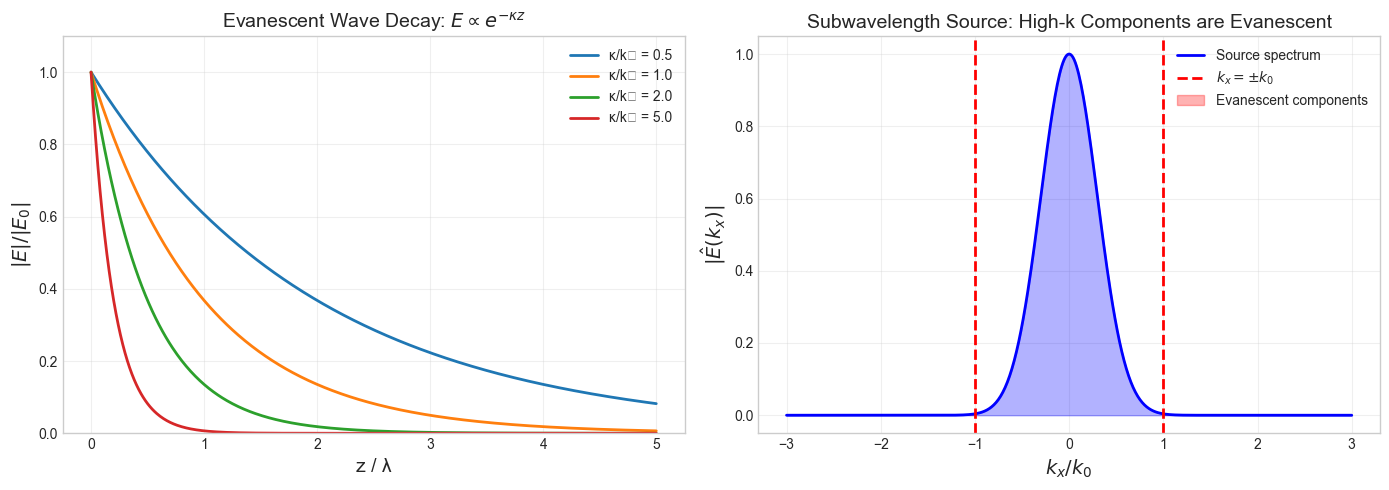

Subwavelength sources have significant amplitude at |kx| > k0
These high-k components decay exponentially → information lost!


In [7]:
# Demonstrate evanescent wave decay
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Evanescent decay
ax1 = axes[0]
z = np.linspace(0, 5, 500)  # in units of λ
kappa_values = [0.5, 1.0, 2.0, 5.0]  # Different evanescent decay rates

for kappa in kappa_values:
    decay = np.exp(-kappa * z)
    ax1.plot(z, decay, linewidth=2, label=f'κ/k₀ = {kappa}')

ax1.set_xlabel('z / λ', fontsize=14)
ax1.set_ylabel(r'$|E| / |E_0|$', fontsize=14)
ax1.set_title(r'Evanescent Wave Decay: $E \propto e^{-\kappa z}$', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 1.1)

# Right: Source spectrum
ax2 = axes[1]
kx = np.linspace(-3, 3, 500)

# Gaussian source in k-space - subwavelength source has wide k-spectrum
sigma = 0.3
E_kx = np.exp(-kx**2 / (2*sigma**2))

ax2.fill_between(kx, E_kx, alpha=0.3, color='blue')
ax2.plot(kx, E_kx, 'b-', linewidth=2, label='Source spectrum')
ax2.axvline(x=-1, color='red', linestyle='--', linewidth=2)
ax2.axvline(x=1, color='red', linestyle='--', linewidth=2, label=r'$k_x = \pm k_0$')
ax2.fill_between(kx, E_kx, where=(np.abs(kx) > 1), alpha=0.3, color='red', label='Evanescent components')

ax2.set_xlabel(r'$k_x / k_0$', fontsize=14)
ax2.set_ylabel(r'$|\hat{E}(k_x)|$', fontsize=14)
ax2.set_title('Subwavelength Source: High-k Components are Evanescent', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('Subwavelength sources have significant amplitude at |kx| > k0')
print('These high-k components decay exponentially → information lost!')

---

## 1.7 The Sign of n: Key to Metamaterials!

From $n = \sqrt{\varepsilon_r \mu_r}$, we might expect:
- If $\varepsilon_r > 0$ and $\mu_r > 0$: $n > 0$ ✓ (normal materials)
- If $\varepsilon_r < 0$ and $\mu_r > 0$: $n$ is imaginary (metals at ω < ωₚ)
- If $\varepsilon_r > 0$ and $\mu_r < 0$: $n$ is imaginary (rare)
- **If $\varepsilon_r < 0$ AND $\mu_r < 0$: $n < 0$** ⚡

### The Veselago Discovery (1968)

Victor Veselago showed that when **both ε and μ are negative**, the refractive index is **negative**!

$$n = -\sqrt{|\varepsilon_r| |\mu_r|} < 0$$

This leads to **extraordinary phenomena**:
- Negative refraction (Snell's law reversed)
- Backward wave propagation
- Reversed Doppler effect
- Reversed Cherenkov radiation

D:\git\temp\ipykernel_18092\1299033185.py:37: UserWarning: Glyph 8346 (\N{LATIN SUBSCRIPT SMALL LETTER P}) missing from font(s) Arial.
  plt.tight_layout()
d:\pymetalearn\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8346 (\N{LATIN SUBSCRIPT SMALL LETTER P}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


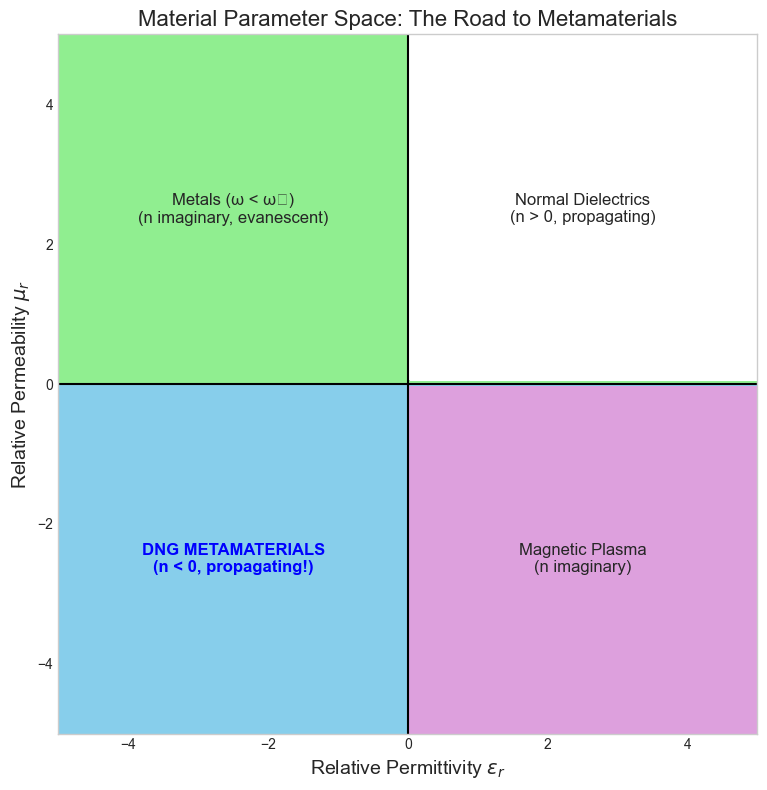

In [8]:
# Visualize the (ε, μ) parameter space
fig, ax = plt.subplots(figsize=(10, 8))

# Create regions
eps_range = np.linspace(-5, 5, 100)
mu_range = np.linspace(-5, 5, 100)
EPS, MU = np.meshgrid(eps_range, mu_range)

# Color each quadrant
colors = np.zeros_like(EPS)
colors[(EPS > 0) & (MU > 0)] = 1  # Normal dielectrics
colors[(EPS < 0) & (MU > 0)] = 2  # Electric negative (metals)
colors[(EPS < 0) & (MU < 0)] = 3  # Double negative (metamaterials!)
colors[(EPS > 0) & (MU < 0)] = 4  # Magnetic negative

cmap = plt.cm.colors.ListedColormap(['white', '#90EE90', '#FFB6C1', '#87CEEB', '#DDA0DD'])
ax.contourf(EPS, MU, colors, levels=[0.5, 1.5, 2.5, 3.5, 4.5], cmap=cmap)

# Labels for each quadrant
ax.annotate('Normal Dielectrics\n(n > 0, propagating)', (2.5, 2.5), fontsize=12, ha='center', va='center')
ax.annotate('Metals (ω < ωₚ)\n(n imaginary, evanescent)', (-2.5, 2.5), fontsize=12, ha='center', va='center')
ax.annotate('DNG METAMATERIALS\n(n < 0, propagating!)', (-2.5, -2.5), fontsize=12, ha='center', va='center', 
            fontweight='bold', color='blue')
ax.annotate('Magnetic Plasma\n(n imaginary)', (2.5, -2.5), fontsize=12, ha='center', va='center')

# Axes
ax.axhline(y=0, color='black', linewidth=1.5)
ax.axvline(x=0, color='black', linewidth=1.5)
ax.set_xlabel(r'Relative Permittivity $\varepsilon_r$', fontsize=14)
ax.set_ylabel(r'Relative Permeability $\mu_r$', fontsize=14)
ax.set_title('Material Parameter Space: The Road to Metamaterials', fontsize=16)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

## 1.8 Impedance and Reflections

The **wave impedance** of a medium is:

$$\eta = \sqrt{\frac{\mu}{\varepsilon}} = \eta_0 \sqrt{\frac{\mu_r}{\varepsilon_r}}$$

Where $\eta_0 = \sqrt{\mu_0/\varepsilon_0} \approx 377 \, \Omega$ is the impedance of free space.

### Key Insight

For a **matched** DNG metamaterial where $\varepsilon_r = \mu_r = -1$:

$$\eta = \eta_0 \sqrt{\frac{-1}{-1}} = \eta_0$$

This means **zero reflection** at the interface! This is crucial for the perfect lens.

In [9]:
# Calculate impedance for different materials
eta_0 = np.sqrt(mu_0 / epsilon_0)
print(f"Impedance of free space: η₀ = {eta_0:.2f} Ω")
print("\n" + "=" * 60)

test_materials = [
    ('Vacuum', 1, 1),
    ('Glass (n=1.5)', 2.25, 1),
    ('Silicon (n=3.4)', 11.56, 1),
    ('Matched DNG', -1, -1),
    ('Unmatched DNG', -2, -1),
]

print(f"{'Material':<25} {'εᵣ':<10} {'μᵣ':<10} {'η (Ω)':<15} {'n':<10}")
print("-" * 60)

for name, eps_r, mu_r in test_materials:
    if eps_r * mu_r > 0:  # Real impedance
        eta = eta_0 * np.sqrt(abs(mu_r) / abs(eps_r))
        n = np.sqrt(eps_r * mu_r)
        if eps_r < 0 and mu_r < 0:
            n = -abs(n)  # DNG has negative n
        print(f"{name:<25} {eps_r:<10.2f} {mu_r:<10.2f} {eta:<15.2f} {n:<10.2f}")
    else:
        print(f"{name:<25} {eps_r:<10.2f} {mu_r:<10.2f} {'imaginary':<15} {'imaginary':<10}")

Impedance of free space: η₀ = 376.73 Ω

Material                  εᵣ         μᵣ         η (Ω)           n         
------------------------------------------------------------
Vacuum                    1.00       1.00       376.73          1.00      
Glass (n=1.5)             2.25       1.00       251.16          1.50      
Silicon (n=3.4)           11.56      1.00       110.80          3.40      
Matched DNG               -1.00      -1.00      376.73          -1.00     
Unmatched DNG             -2.00      -1.00      266.39          -1.41     


---

## 1.9 Summary & Key Takeaways

### What We Learned

1. **Maxwell's equations** describe all electromagnetic phenomena
2. **Constitutive relations** connect fields through ε and μ
3. The **wave equation** emerges from Maxwell's equations
4. **Refractive index** n = √(εᵣμᵣ) determines wave propagation
5. **Angular spectrum representation** decomposes fields into plane waves
6. **Evanescent waves** (k > k₀) decay exponentially and carry subwavelength info
7. **Diffraction limit** Δx ~ λ comes from loss of evanescent waves
8. **Negative index** (n < 0) requires BOTH ε < 0 AND μ < 0

### Preview of Next Chapter

In **Chapter 2: The Drude Model**, we will:
- Derive the dielectric function of metals
- Understand the plasma frequency
- See why metals have ε < 0 at certain frequencies
- Learn how to engineer negative permittivity

---

## 📝 Exercises

1. **Derive** the wave equation for the magnetic field H
2. **Calculate** the wavelength of 600 nm light in silicon (n = 3.4)
3. **Show** that for a DNG medium with ε = μ = -1, the group velocity is opposite to the phase velocity
4. **Prove** that the Fresnel reflection coefficient is zero when impedances are matched
5. **Calculate** the decay length for an evanescent wave with kₓ = 2k₀

In [10]:
# Exercise 2 Solution Space
lambda_0 = 600e-9  # 600 nm in vacuum
n_silicon = 3.4

# TODO: Calculate wavelength in silicon
# lambda_silicon = ?

# Uncomment below to check your answer:
# lambda_silicon = lambda_0 / n_silicon
# print(f"Wavelength in silicon: {lambda_silicon * 1e9:.1f} nm")

---

## 📚 References

1. J.D. Jackson, *Classical Electrodynamics*, 3rd Ed., Wiley (1999)
2. V.G. Veselago, "The electrodynamics of substances with simultaneously negative values of ε and μ", *Soviet Physics Uspekhi* **10**, 509 (1968)
3. D.R. Smith et al., "Metamaterials and Negative Refractive Index", *Science* **305**, 788 (2004)
4. J.W. Goodman, *Introduction to Fourier Optics*, 4th Ed., W.H. Freeman (2017)

---

**Next Chapter: [02 - The Drude Model](02_drude_model.ipynb)** →